# Exercise - Application (US Baby Names Dataset)

This exercise is aimed at a simulating a data project which includes:
  
  1. File IO
  1. Merging and Data Manipulation
  1. Data Analysis

There are many things you may want to do with the data set:

  1. Visualize the proportion of babies given a particular name
  1. Determine the relative rank of a name
  1. Determine the most popular names in each year or the names with largest rank changes
  1. ...

__Reference:__ 

"Python for Data Analysis" by Wes McKinney

In [1]:
%matplotlib inline
import pandas as pd

## Data Collection

You will need to download the data from: https://www.ssa.gov/oact/babynames/limits.html

Then click on "National data" (8 Mb) to download the file: ``names.zip``

In [2]:
#-Find the Data-#
%pwd

'/Users/matthewmckay/repos/work-quantecon/seminars/2016-chicago-federal-reserve'

In [3]:
fl = "./names/yob1880.txt"

In [4]:
n1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [5]:
n1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


**[Q]** Given the dataset provided, how many Males and Females were born in 1880? 

In [6]:
n1880.groupby('sex').births.sum()

sex
F     90992
M    110490
Name: births, dtype: int64

**[Q]** Given the date range is 1880 to 2015, how would you assemble the data into a single dataframe and add a **year** column?

In [7]:
years = range(1880, 2015+1)

In [8]:
collection = []

In [9]:
for year in years:
    fl = 'names/yob%s.txt' % year
    df = pd.read_csv(fl, names=['name','sex','births'])
    
    # Finish Working
    # Add a Year Column
    # Make a list of pd.DataFrames in collection

In [10]:
for year in years:
    fl = 'names/yob%s.txt' % year
    df = pd.read_csv(fl, names=['name','sex','births'])
    df['year'] = year
    collection.append(df)

Concatenate everything into a single DataFrame

In [11]:
pd.concat?

In [12]:
names = pd.concat(collection, ignore_index=True)

In [13]:
names.shape

(1858689, 4)

In [14]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


**[Q]** Compute the total number of male and female births each year

In [15]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [16]:
total_births.head()

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


**[Q]** Plot this data as a time series from 1880 to 2015

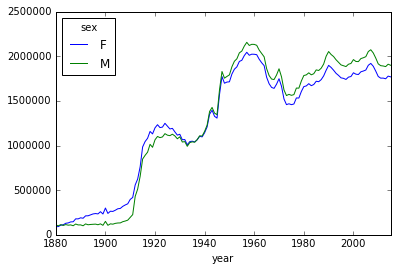

In [17]:
total_births.plot()

**[Q]** Insert a column named "prop" with the fraction of babies given each name relative to the total number of births in any given year

In [18]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [19]:
names = names.groupby(['year','sex']).apply(add_prop)

In [20]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


It is good practice to check the computations

**[Q]** Check that each group indexed by year and sex proportion sums to one

In [21]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
    

In [22]:
#-Check Them all-#
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True

**[Q]** How can you split the dataframe into boys and girls dataframes

In [23]:
girls = names[names.sex == 'F']
boys = names[names.sex == 'M']

In [24]:
boys.head()

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9531,1880,0.086261
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393


**[Q]** Plot the popularity of a name of your choice over time?

In [25]:
total_births = names.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [26]:
total_births.tail()

name,Aaban,Aabha,Aabid,Aabriella,Aada,Aadam,Aadan,Aadarsh,Aaden,Aadesh,...,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyanna,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2011,11.0,7.0,NaN,NaN,NaN,17.0,11.0,7.0,274.0,5.0,...,NaN,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,11.0,5.0,NaN,NaN,NaN,11.0,11.0,12.0,223.0,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,14.0,NaN,NaN,NaN,NaN,16.0,13.0,12.0,203.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,16.0,9.0,NaN,5.0,NaN,19.0,8.0,18.0,237.0,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
2015,15.0,7.0,NaN,5.0,5.0,22.0,10.0,15.0,296.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN,NaN,NaN


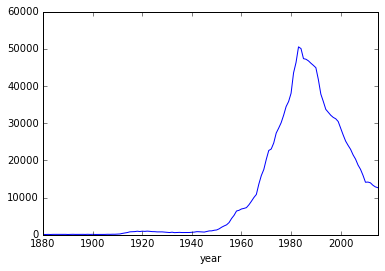

In [27]:
total_births['Matthew'].plot()

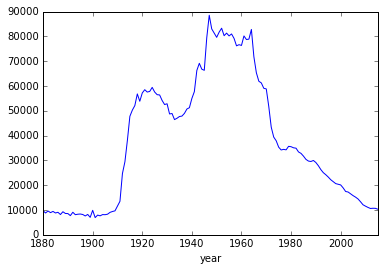

In [28]:
total_births['John'].plot()

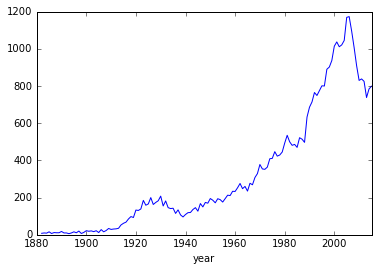

In [29]:
total_births['Pablo'].plot()

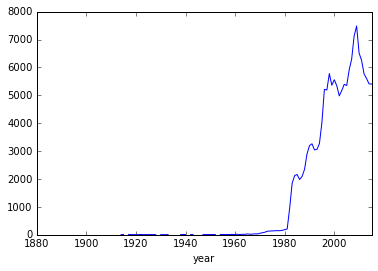

In [30]:
total_births['Chase'].plot()

**[Q]** Compute the number of unique names in each year? Is name diversity increasing or decreasing?

In [31]:
total_births.head()

name,Aaban,Aabha,Aabid,Aabriella,Aada,Aadam,Aadan,Aadarsh,Aaden,Aadesh,...,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyanna,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


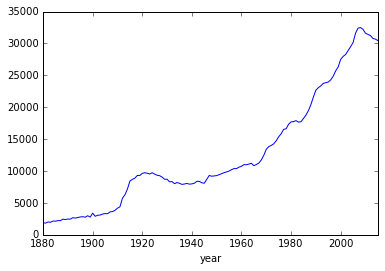

In [33]:
total_births.T.count().plot()